In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 122.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.0 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'A4OmtyaBHFE'

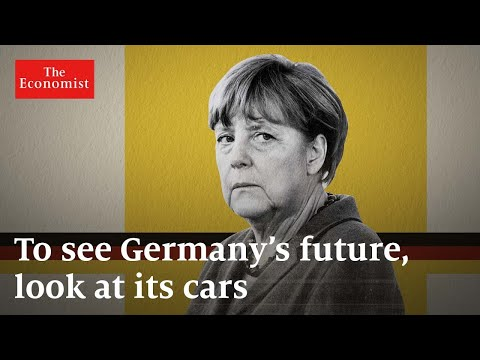

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'text': "for Germany it's the end of an era and",
  'start': 1.439,
  'duration': 5.46},
 {'text': "as Europe's biggest economy there are",
  'start': 4.859,
  'duration': 4.801},
 {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32},
 {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84},
 {'text': 'relationship with China to climate',
  'start': 11.219,
  'duration': 4.98}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9003


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)



input text 
 for Germany it's the end of an era and as Europe's biggest economy there are some huge challenges ahead from its increasingly complex relationship with China to climate change all eyes will be on how Germany's new leaders grapple with these issues but there's one German industry that reveals a lot about the country's prospects it's cars traditionally the car industry here has been very powerful there have been open doors to German Ministries to the Chancery Germany's car industry is a vital part of its economy with links to government that go back decades how this world renowned motor industry navigates the challenges ahead could tell you more than you think about Germany's future [Music] the curves the Precision it's Cutting Edge engineering like this that has helped Place car makers at the heart of the German economy and the industry has proved of Bellwether for the country's future prospects too since the 70s car exports have risen with Germany's wealth and influence ma

Your max_length is set to 142, but your input_length is only 4. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Summarized text
 economist's assessment of Germany's future after Angela Merkel . Germany risks losing competitiveness throughout its economy . Germany has to do better right we have those very big companies this very big players here but they aren't the disruptor the driver behind in Innovation disruption comes always for me new Young companies which Drive change .
input text 
ibe
Summarized text
 ibe ibe. ibe . ibe is the world's first female president . She was elected to the U.S. Senate in 2008 . ibi is the first woman to hold a Senate seat in Congress to represent the nation's first black president . The U.N. Senate is the second chamber in the world to hold the chamber chamber .


In [ ]:
len(str(summarized_text))

3240

In [ ]:
text=str(summarized_text)

In [ ]:
text

'[" Germany\'s car industry is a vital part of its economy with links to government that go back decades . The industry has proved of Bellwether for the country\'s future prospects too since the 70s car exports have risen with Germany\'s wealth and influence manufacturing manufacturing since the 1970s .", " In 2000 seven of the world\'s most valuable companies were German but in the past two decades that number has fallen to just three . Almost half of Germany\'s GDP comes from exports cars make up the biggest proportion of this who Germany Sells Cars to matters it can point to alliances or trouble brewing .", " In 1998 German trade with China was worth 16 billion dollars dollars now it\'s worth over 180 billion . There\'s a fear that Germany could have become too reliant on the Chinese market for the past 16 years . Angela Merkel has courted China in the name of trade but there\'s a worry of putting all of your eggs in the Chinese basket might leave you exposed to some of the ill Wind

In [ ]:
! pip install regex


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array

from keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
tag_re =re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return tag_re.sub('', text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence =sen.lower()

    #Remove html tags
    sentence =remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
X = []
sentences = list(summarized_text)
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[1]

' seven world valuable companies german past two decades number fallen three almost half germany gdp comes exports cars make biggest proportion germany sells cars matters point alliances trouble brewing '

In [ ]:
y = summarized_text

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

174

In [ ]:
#Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(174, 100)

## LSTM model Training

In [ ]:
from keras.layers import LSTM

In [ ]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          17400     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 134777 (526.47 KB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 17400 (67.97 KB)
_________________________________________________________________
None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
1/1 [==============================] - 0s 269ms/step - loss: 6.1278e-05 - acc: 1.0000 - val_loss: 5.6315e-05 - val_acc: 1.0000
Epoch 2/6
1/1 [==============================] - 0s 186ms/step - loss: 5.6315e-05 - acc: 1.0000 - val_loss: 5.2129e-05 - val_acc: 1.0000
Epoch 3/6
1/1 [==============================] - 0s 181ms/step - loss: 5.2129e-05 - acc: 1.0000 - val_loss: 4.8568e-05 - val_acc: 1.0000
Epoch 4/6
1/1 [==============================] - 0s 151ms/step - loss: 4.8568e-05 - acc: 1.0000 - val_loss: 4.5516e-05 - val_acc: 1.0000
Epoch 5/6
1/1 [==============================] - 0s 140ms/step - loss: 4.5516e-05 - acc: 1.0000 - val_loss: 4.2883e-05 - val_acc: 1.0000
Epoch 6/6
1/1 [==============================] - 0s 142ms/step - loss: 4.2883e-05 - acc: 1.0000 - val_loss: 4.0598e-05 - val_acc: 1.0000


In [ ]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 37ms/step - loss: 0.5972 - acc: 1.0000


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5971584320068359
Test Accuracy: 1.0


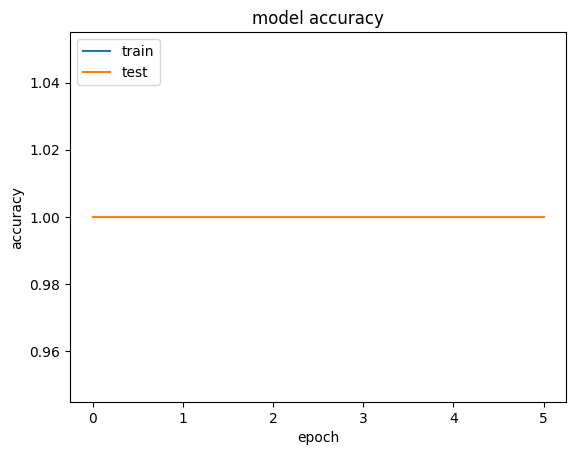

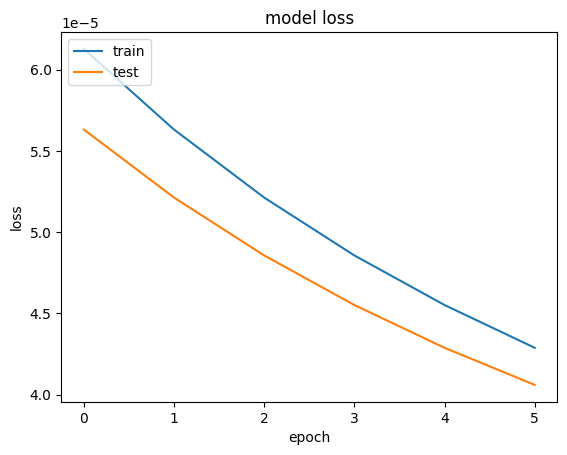

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [57]:
from transformers import pipeline as pl

set_pipeline= pl("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [63]:
set_pipeline(str([X]))

[{'label': 'NEGATIVE', 'score': 0.9788990616798401}]